# EECS4404 Assignment #1 - Naive Bayes

## Step 0: Download and load the data.

In [1]:
import numpy as np
import csv
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%pylab inline

filename = 'mushrooms.csv'
with open(filename, 'rb') as raw_file:
    raw_data = csv.reader(raw_file, delimiter=',', quoting=csv.QUOTE_NONE)
    data_list = list(raw_data)

ndims = len(data_list[0])
npts = len(data_list)

char_maps = [OrderedDict() for i in range(ndims)]
reverse_maps = [[] for i in range(ndims)]
data_mat = empty((npts,ndims),dtype=int32)
for i,cdata in enumerate(data_list):
    for j,cstr in enumerate(cdata):
        if cstr not in char_maps[j]:
            char_maps[j][cstr] = len(char_maps[j])
            reverse_maps[j].append(cstr)
        data_mat[i,j] = char_maps[j][cstr]

random.seed(0)
data_perm = random.permutation(npts)
data_train = data_mat[data_perm[0:(8*npts/10)],:] # length is 6499
data_test = data_mat[data_perm[(8*npts/10):],:] # length is 1625
data_ranges = data_mat[:,1:].max(axis=0) # removes the first column of E or P
data_ranges_inc = data_mat[:,:].max(axis=0)
data_train_t = data_train.transpose()

Populating the interactive namespace from numpy and matplotlib


In [2]:
edible_shrooms = np.array([i for i in data_train if i[0] == 1])
poisonous_shrooms = np.array([i for i in data_train if i[0] == 0])
edible_shrooms_t = edible_shrooms.transpose()
poisonous_shrooms_t = poisonous_shrooms.transpose()

In [3]:
frac_of_edible = float(len(edible_shrooms)) / len(data_train)
print frac_of_edible

0.517771964918


In [4]:
frac_of_poisonous = float(len(poisonous_shrooms)) / len(data_train)
print frac_of_poisonous

0.482228035082


## Step 1: Analyze the data.

### f1: cap-shape

(-0.5, 5.5)

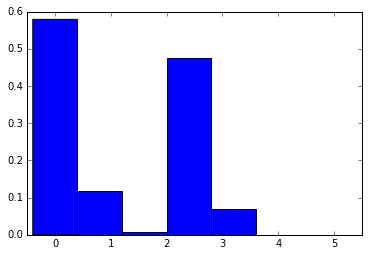

In [11]:
plt.hist(edible_shrooms_t[1], normed=1, align="left", bins=int(data_ranges[0]))
plt.xlim([-0.5, 5.5])

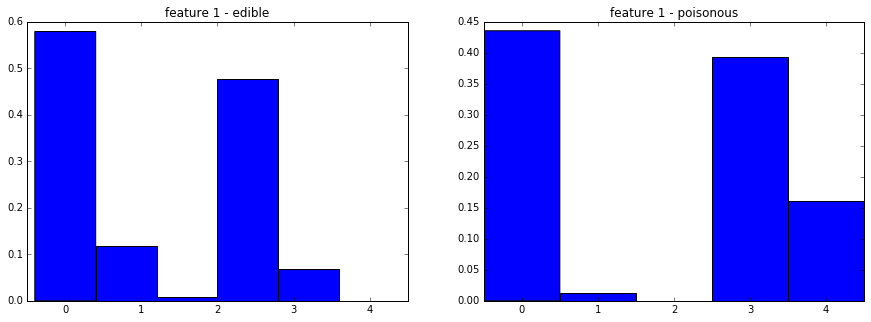

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[1], bins=int(data_ranges[0]), normed=1, align="left")
plt.xlim([-0.5,4.5])
plt.title('feature 1 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[1], bins=int(data_ranges[0]), normed=1, align="left")
plt.xlim([-0.5,4.5])
plt.title('feature 1 - poisonous')

### f2: cap-surface

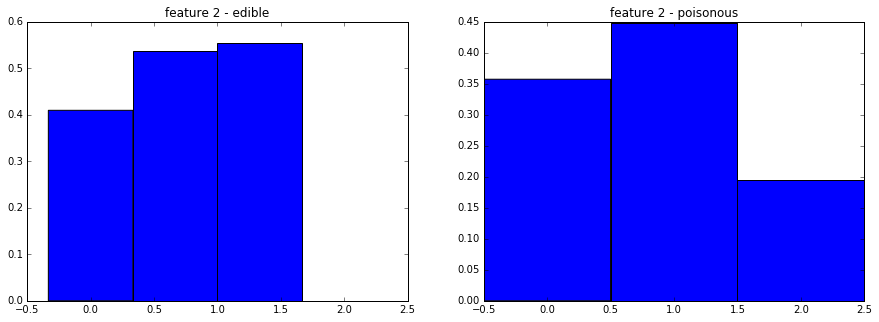

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[2], bins=int(data_ranges[1]), normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 2 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[2], bins=int(data_ranges[1]), normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 2 - poisonous')

### f3: cap-color

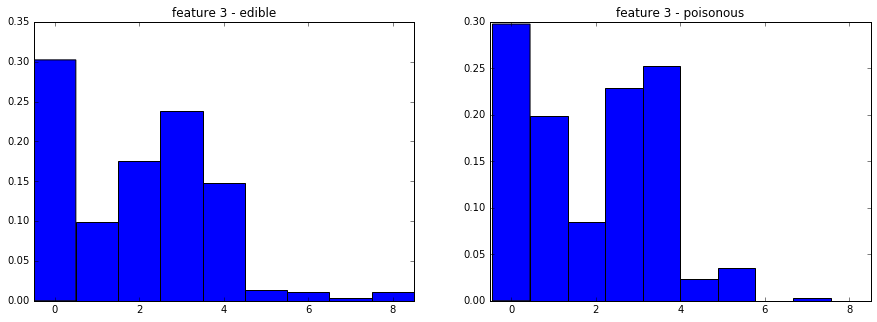

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[3], bins=int(data_ranges[2]), normed=1, align="left")
plt.xlim([-0.5,8.5])
plt.title('feature 3 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[3], bins=int(data_ranges[2]), normed=1, align="left")
plt.xlim([-0.5,8.5])
plt.title('feature 3 - poisonous')

### f4: bruises

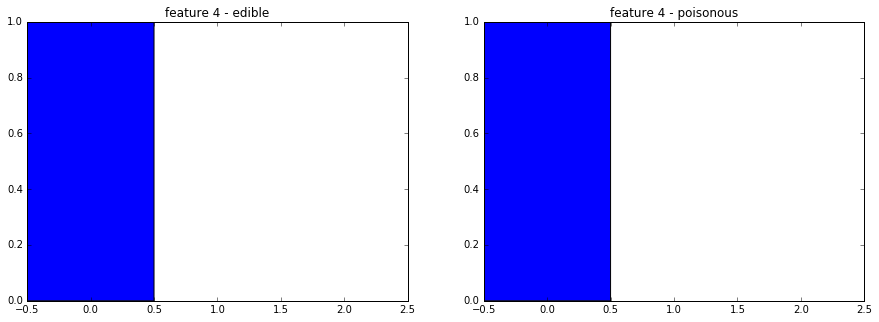

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[4],bins=int(data_ranges[3]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 4 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[4],bins=int(data_ranges[3]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 4 - poisonous')

### f5: odor

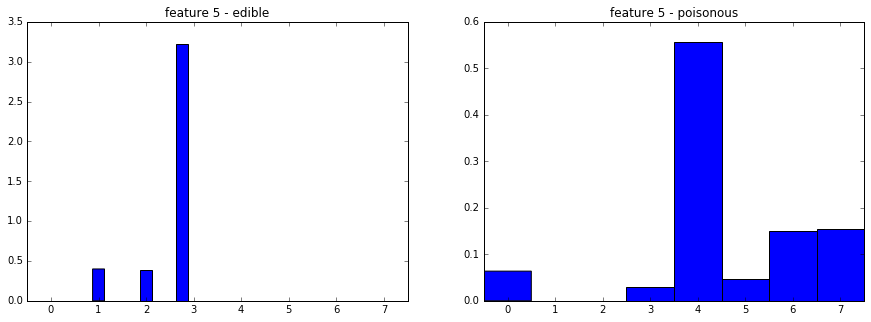

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[5],bins=int(data_ranges[4]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 5 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[5],bins=int(data_ranges[4]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 5 - poisonous')

### f6: gill-attachment

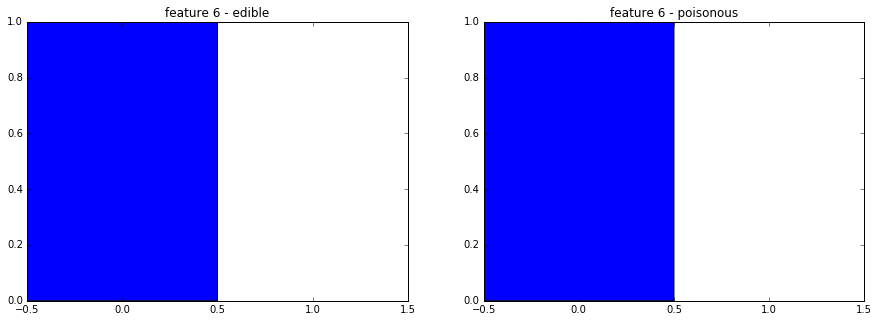

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[6],bins=int(data_ranges[5]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 6 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[6],bins=int(data_ranges[5]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 6 - poisonous')

### f7: gill-spacing

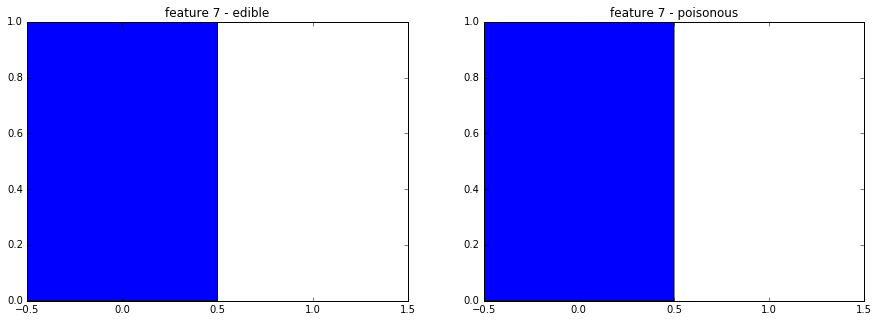

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[7],bins=int(data_ranges[6]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 7 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[7],bins=int(data_ranges[6]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 7 - poisonous')

### f8: gill-size

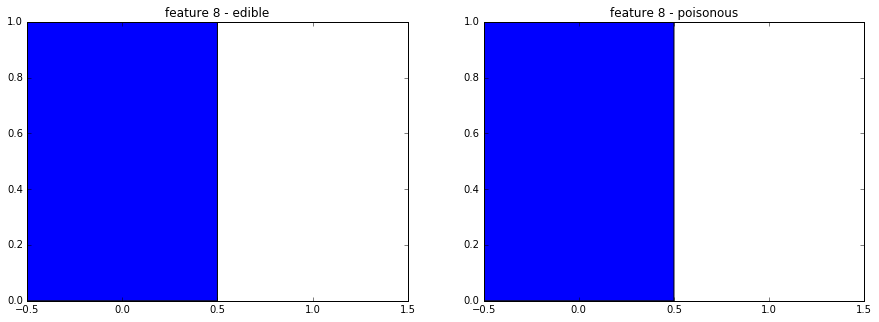

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[8],bins=int(data_ranges[7]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 8 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[8],bins=int(data_ranges[7]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 8 - poisonous')

### f9: gill-color

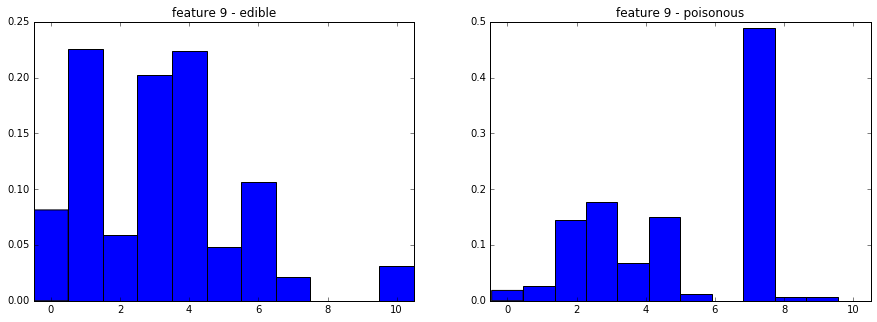

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[9],bins=int(data_ranges[8]),normed=1, align="left")
plt.xlim([-0.5,10.5])
plt.title('feature 9 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[9],bins=int(data_ranges[8]),normed=1, align="left")
plt.xlim([-0.5,10.5])
plt.title('feature 9 - poisonous')

### f10: stalk-shape

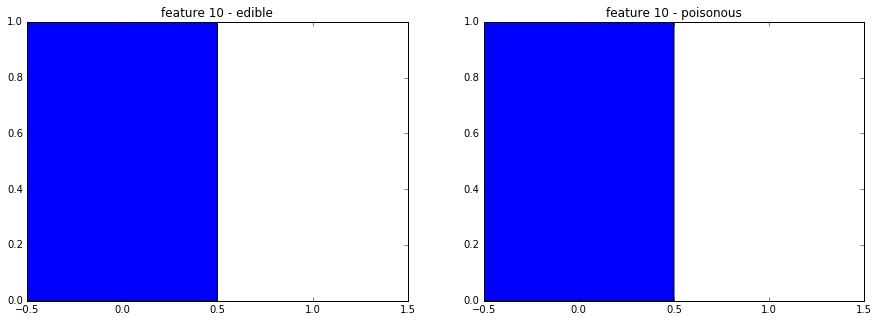

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[10],bins=int(data_ranges[9]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 10 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[10],bins=int(data_ranges[9]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 10 - poisonous')

### f11: stalk-root

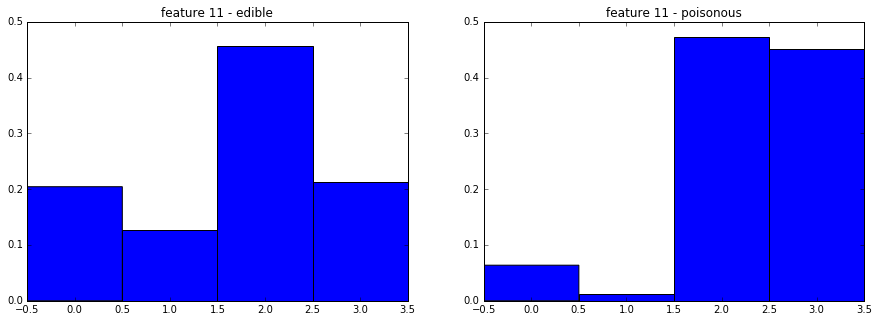

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[11],bins=int(data_ranges[10]),normed=1, align="left")
plt.xlim([-0.5,3.5])
plt.title('feature 11 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[11],bins=int(data_ranges[10]),normed=1, align="left")
plt.xlim([-0.5,3.5])
plt.title('feature 11 - poisonous')

### f12: stalk-surface-above-ring

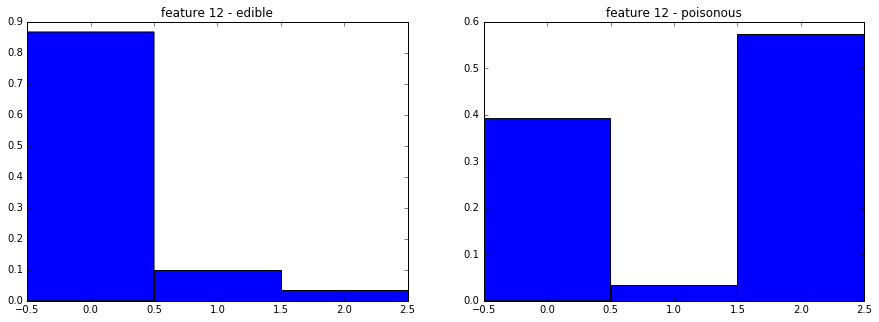

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[12],bins=int(data_ranges[11]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 12 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[12],bins=int(data_ranges[11]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 12 - poisonous')

### f13: stalk-surface-below-ring

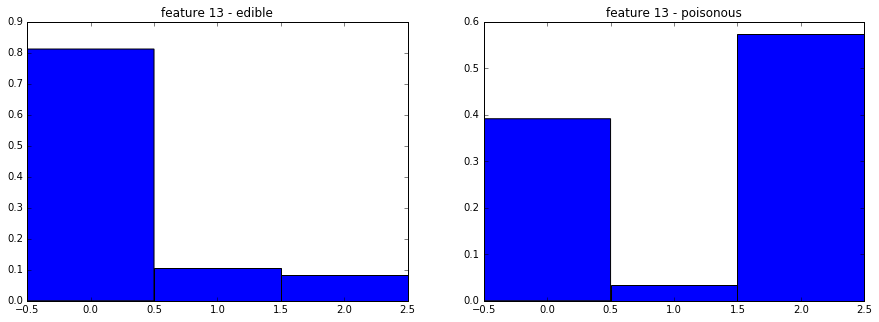

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[13],bins=int(data_ranges[12]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 13 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[13],bins=int(data_ranges[12]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 13 - poisonous')

### f14: stalk-color-above-ring

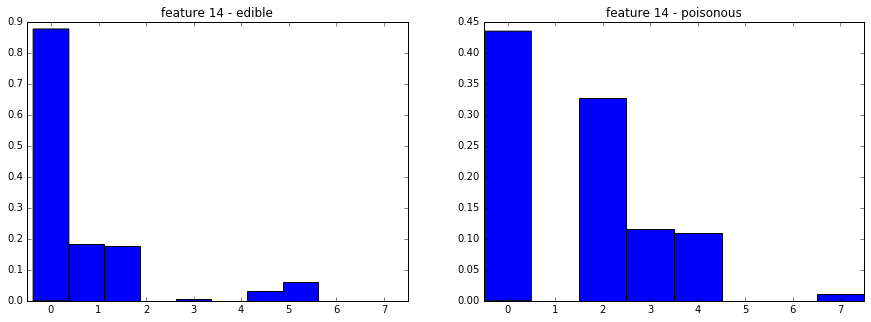

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[14],bins=int(data_ranges[13]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 14 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[14],bins=int(data_ranges[13]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 14 - poisonous')

### f15: stalk-color-below-ring

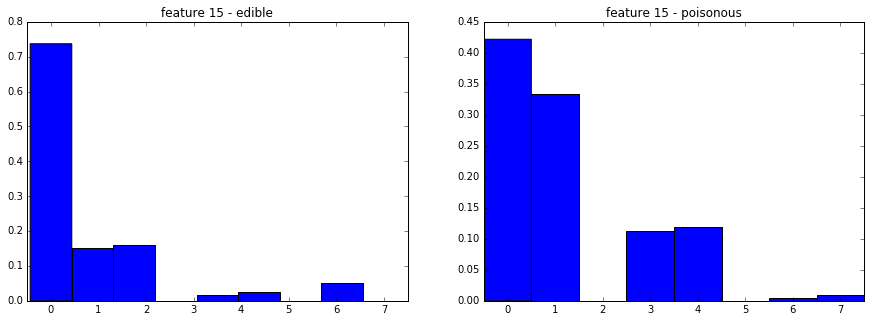

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[15],bins=int(data_ranges[14]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 15 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[15],bins=int(data_ranges[14]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 15 - poisonous')

### f16: veil-type

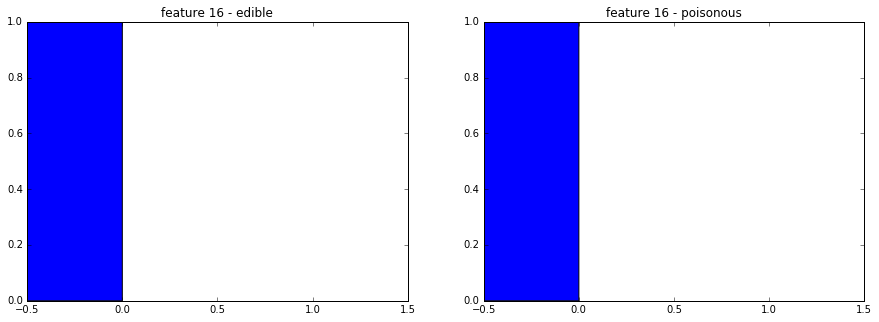

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[16],normed=1, bins=int(data_ranges[15])+1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 16 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[16],normed=1, bins=int(data_ranges[15])+1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 16 - poisonous')

### f17: veil-color

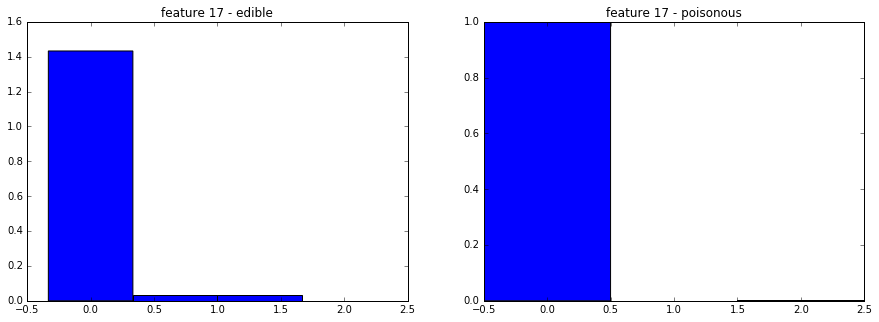

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[17],bins=int(data_ranges[16]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 17 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[17],bins=int(data_ranges[16]),normed=1, align="left")
plt.xlim([-0.5,2.5])
plt.title('feature 17 - poisonous')

### f18: ring-number

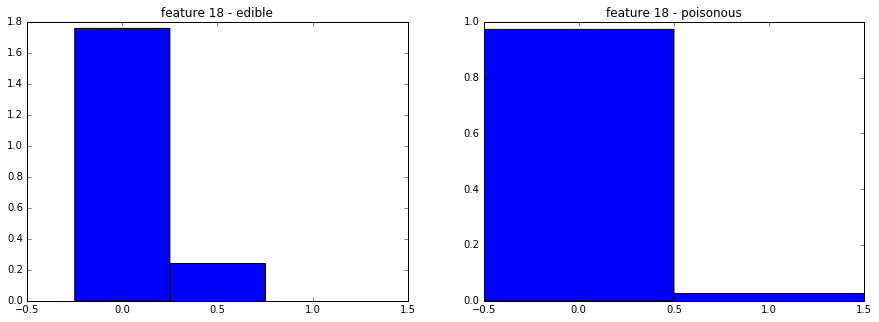

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[18],bins=int(data_ranges[17]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 18 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[18],bins=int(data_ranges[17]),normed=1, align="left")
plt.xlim([-0.5,1.5])
plt.title('feature 18 - poisonous')

### f19: ring-type

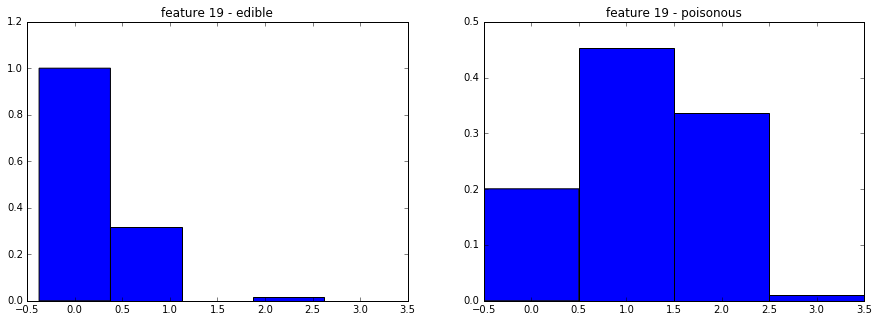

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[19],bins=int(data_ranges[18]),normed=1, align="left")
plt.xlim([-0.5,3.5])
plt.title('feature 19 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[19],bins=int(data_ranges[18]),normed=1, align="left")
plt.xlim([-0.5,3.5])
plt.title('feature 19 - poisonous')

### f20: spore-print-color

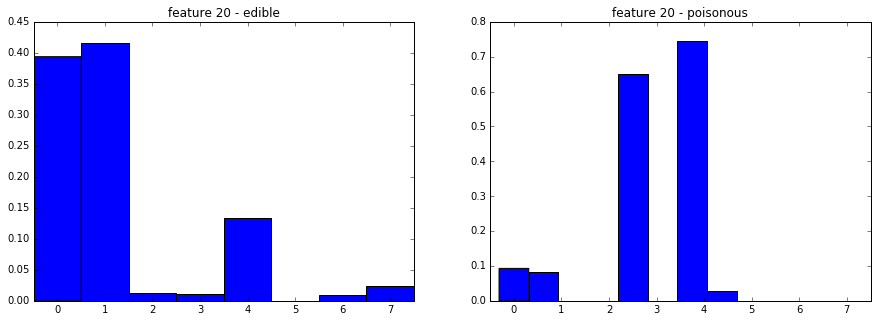

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[20],bins=int(data_ranges[19]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 20 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[20],bins=int(data_ranges[19]),normed=1, align="left")
plt.xlim([-0.5,7.5])
plt.title('feature 20 - poisonous')

### f21: population

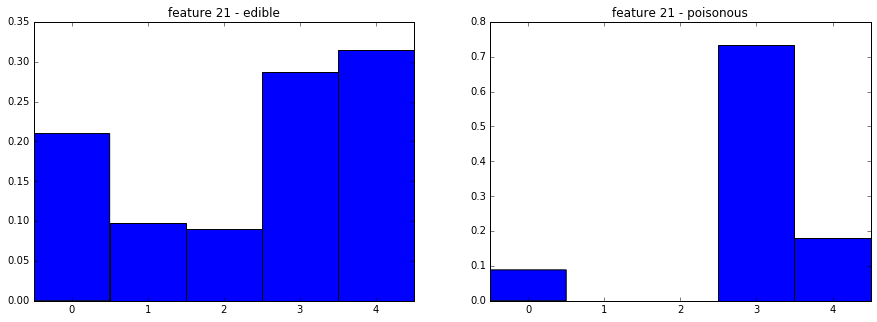

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[21],bins=int(data_ranges[20]),normed=1, align="left")
plt.xlim([-0.5,4.5])
plt.title('feature 21 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[21],bins=int(data_ranges[20]),normed=1, align="left")
plt.xlim([-0.5,4.5])
plt.title('feature 21 - poisonous')

### f22: habitat

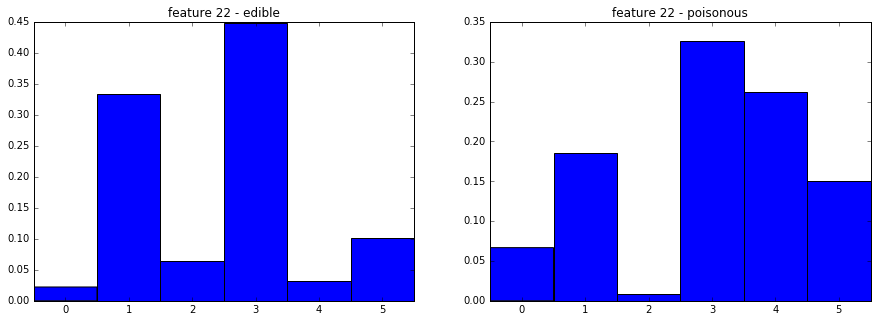

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(edible_shrooms_t[22],bins=int(data_ranges[21]),normed=1, align="left")
plt.xlim([-0.5,5.5])
plt.title('feature 22 - edible')
plt.subplot(122)
plt.hist(poisonous_shrooms_t[22],bins=int(data_ranges[21]),normed=1, align="left")
plt.xlim([-0.5,5.5])
plt.title('feature 22 - poisonous')

## Step 2: Fit a Naive Bayes classifier to the data.

### Naive Bayes Classifier

In [15]:
class NaiveBayesClassifier:
    def __init__(self, alpha=1.1):
        self.alpha = alpha
        self.p1 = None
        self.p0 = None
        self.feat_given_p_shrooms_dist = []
        self.feat_given_e_shrooms_dist = []
        self.p_shrooms = None
        self.e_shrooms = None
        self.data_range = []
        self.prediction = []
        
    def MAPEstimateFeatures(self, data, num):
        """
        MAP Estimate based on the Dirichlet Multinomial Formula for Features or Data
        """
        l = []
        N = len(data) # 6499
        k = self.data_range.shape[0] # 22
        for i in range(self.data_range[num] + 1):
            Nk = len([j for j in data if j[0] == i])
            theta_k = float(Nk + self.alpha - 1)/(N + k*self.alpha - k)
            l.append(theta_k)
        return tuple(l)
    
    def MAPEstimateLabels(self, data):
        """
        MAP Estimate based on the Dirichlet Multinomial Formula for Labels or Classes
        """
        l = []
        N = len(data) # 6499
        k = 2
        for i in range(int(data.max(axis=0)) + 1):
            Nk = len([j for j in data_train if j[0] == i])
            theta_k = float(Nk + self.alpha - 1)/(N + k*self.alpha - k)
            l.append(theta_k)
        return tuple(l)
    
    def train(self, data_train):
        """
        Trains the Naive Bayes Classifier using MAP Estimate for the priors and likelihoods
        """
        # Grabbing the maximum numbers of features values per feature
        self.data_range = data_train[:,:].max(axis=0)
        
        # Splitting the training data into a list of posionous mushrooms
        self.p_shrooms = np.array([row for row in data_train if row[0] == 0])
        
        # Splitting the training data into a list of edible mushrooms
        self.e_shrooms = np.array([row for row in data_train if row[0] == 1])
        
        # Finding the priors for mushroom is poisonous and mushroom is edible
        self.p0, self.p1 = self.MAPEstimateLabels(data_train[:,0:1])
        
        # Finding the likelihood distributions of features given the mushroom is poisonous
        for i in range(1, self.p_shrooms.shape[1]):
            #print self.p_shrooms[:,i:i+1]
            t = self.MAPEstimateFeatures(self.p_shrooms[:,i:i+1], i)
            self.feat_given_p_shrooms_dist.append(t)
            
        # Finding the likelihood distributions of features given the mushroom is edible
        for i in range(1, self.e_shrooms.shape[1]):
            t = self.MAPEstimateFeatures(self.e_shrooms[:,i:i+1], i)
            self.feat_given_e_shrooms_dist.append(t)
        
    def predict(self, data_test):
        """
        Predicts the new dataset based on the original trained model.
        """
        predictions = []
        for i in data_test:
            l0 = 0 # likelihood for E = 0
            l1 = 0 # likelihood for E = 1
            lp0 = None # likelihood * prior
            lp1 = None # likelihood * prior
            final_prob = 0
            
            for j in range(len(i)):
                # Finding the likelihood for mushroom is poisonous
                l0 = l0 + np.log(self.feat_given_p_shrooms_dist[j][i[j]])
                
                 # Finding the likelihood for mushroom is poisonous
                l1 = l1 + np.log(self.feat_given_e_shrooms_dist[j][i[j]])
                
            # Calculating the likelihood multiply prior where mushroom is poisonous
            lp0 = exp(l0 + np.log(self.p0))
            
            # Calculating the likelihood multiply prior where mushroom is edible
            lp1 = exp(l1 + np.log(self.p1))
            
            # Calculating the posterior probability from likelihood, prior and evidence
            #final_prob = np.exp(lp1 - (np.log(exp(lp1 - max(lp1, lp0)) + exp(lp0 - max(lp1, lp0))) + max(lp1, lp0))) # not logged
            final_prob = (lp1 - (np.log(exp(lp1 - max(lp1, lp0)) + exp(lp0 - max(lp1, lp0))) + max(lp1, lp0))) # logged

            # Appending to the final probabily list
            predictions.append(final_prob)
        return predictions
            

### Testing set accuracy

In [13]:
r = np.arange(1, 2.1, 0.1)
test_accuracy = []
test_alpha = []
for i in r:
    nb = NaiveBayesClassifier(alpha=i)
    nb.train(data_train)
    predictions = nb.predict(data_test[:,1:])
    #predictions_in_01 = [1 if j >= (1/2.0) else 0 for j in predictions] # not logged
    predictions_in_01 = [1 if j >= (log(0.5)) else 0 for j in predictions] # logged
    correct = 0
    for k in range(len(data_test[:,0:1])):
        if predictions_in_01[k] == data_test[:,0:1][k][0]:
            correct = correct + 1
    accuracy = float(correct) / data_test.shape[0]
    test_alpha.append(i)
    test_accuracy.append(accuracy)

/Users/chensteven/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:83: RuntimeWarning: divide by zero encountered in log
/Users/chensteven/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: divide by zero encountered in log


In [14]:
nb.feat_given_e_shrooms_dist

[(0.46044864226682408,
  0.093565525383707202,
  0.0067886658795749703,
  0.37868949232585597,
  0.055194805194805192,
  0.00029515938606847723),
 (0.27154663518299882,
  0.35537190082644626,
  0.36717827626918537,
  0.00029515938606847723),
 (0.30047225501770958,
  0.097992916174734351,
  0.17443919716646988,
  0.23671782762691854,
  0.14669421487603307,
  0.013282172373081463,
  0.010920897284533649,
  0.0041322314049586778,
  0.0079693034238488784,
  0.0035419126328217238),
 (0.65318772136953951, 0.34061393152302244),
 (0.00029515938606847723,
  0.099468713105076739,
  0.095336481700118061,
  0.79929161747343569,
  0.00029515938606847723,
  0.00029515938606847723,
  0.00029515938606847723,
  0.00029515938606847723,
  0.00029515938606847723),
 (0.94893742621015353, 0.044864226682408498),
 (0.71074380165289253, 0.28305785123966942),
 (0.069362455726092093, 0.92443919716646994),
 (0.081168831168831168,
  0.22461629279811099,
  0.059031877213695398,
  0.20159386068476978,
  0.2228453364

### Training set Accuracy

In [25]:
r = np.arange(1, 2.1, 0.1)
train_accuracy = []
train_alpha = []
for i in r:
    nb = NaiveBayesClassifier(alpha=i)
    nb.train(data_train)
    predictions = nb.predict(data_train[:,1:])
    #predictions_in_01 = [1 if j >= (1/2.0) else 0 for j in predictions] # not logged
    predictions_in_01 = [1 if j >= (log(0.5)) else 0 for j in predictions] # logged
    correct = 0
    for k in range(len(data_train[:,0:1])):
        if predictions_in_01[k] == data_train[:,0:1][k][0]:
            correct = correct + 1
    accuracy = float(correct) / data_train.shape[0]
    # Accuracy when alpha = 2
    train_alpha.append(i)
    train_accuracy.append(accuracy)

/Users/chensteven/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:83: RuntimeWarning: divide by zero encountered in log
/Users/chensteven/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: divide by zero encountered in log


### Plot of Accuracy

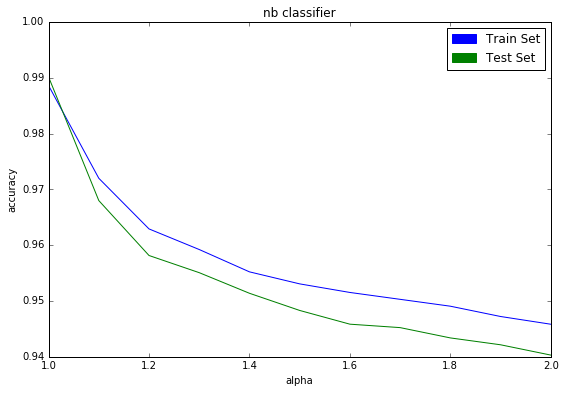

In [30]:
plt.figure(figsize=(9,6))
plt.plot(train_alpha, train_accuracy, test_alpha, test_accuracy)
plt.xlim(1, 2)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('nb classifier')
blue_patch = mpatches.Patch(color='blue', label='Train Set')
green_patch = mpatches.Patch(color='green', label='Test Set')
plt.legend(handles=[blue_patch, green_patch])

## Step 3: Inspect the model

In [30]:
diff_norm = []
diff_abs = []
for i in range(len(nb.feat_given_p_shrooms_dist)):
    for j in range(len(nb.feat_given_e_shrooms_dist[i])):
        diff = np.log(nb.feat_given_e_shrooms_dist[i][j]) - np.log(nb.feat_given_p_shrooms_dist[i][j])
        diff_norm.append((diff, i+1, j))
        diff_abs.append((abs(diff), i+1, j))
diff_norm.sort()
diff_abs.sort()

In [34]:
diff_norm # 3-tuple where (difference, feature, feature value)

[(-7.5351274018504792, 5, 4),
 (-7.3105501585344213, 9, 8),
 (-7.0309652963152596, 19, 2),
 (-6.2275965527995076, 5, 6),
 (-6.1887147652553001, 5, 7),
 (-5.9342487428120494, 15, 3),
 (-5.9170563422716764, 14, 4),
 (-5.3739224752730284, 5, 0),
 (-5.0610501539926886, 5, 5),
 (-4.0959692579491014, 20, 5),
 (-3.5332235770047524, 20, 3),
 (-3.5046047716990989, 5, 8),
 (-3.5046047716990989, 14, 7),
 (-3.5046047716990989, 15, 8),
 (-3.5046047716990989, 18, 2),
 (-3.5046047716990989, 19, 4),
 (-3.4828647850626937, 14, 3),
 (-3.066349840767943, 9, 9),
 (-2.8911059816141922, 12, 2),
 (-2.7873258310592783, 13, 3),
 (-2.7786677683161622, 15, 6),
 (-2.092587754979311, 8, 0),
 (-2.0922258856618794, 22, 4),
 (-2.0603703541334433, 15, 4),
 (-2.0165277162692652, 14, 8),
 (-2.0165277162692652, 17, 3),
 (-1.6800554796480522, 1, 5),
 (-1.4569119283338425, 2, 3),
 (-1.2513308833217538, 20, 4),
 (-1.0869917576450909, 22, 0),
 (-1.0648698405578205, 3, 6),
 (-1.0521150461108855, 1, 4),
 (-1.035990561988988, 9

In [35]:
diff_abs # 3-tuple where (difference, feature, feature value)

[(0.00047835446977699536, 16, 0),
 (0.029243328782770472, 1, 3),
 (0.034852165813289537, 11, 2),
 (0.040302647150036792, 6, 0),
 (0.043503674211115645, 17, 0),
 (0.062181492898894075, 1, 0),
 (0.10124579354466554, 18, 0),
 (0.13355192910587133, 3, 0),
 (0.15815275730777123, 3, 3),
 (0.18035301758111816, 10, 1),
 (0.22539584477835461, 9, 3),
 (0.22571701371579733, 2, 1),
 (0.23468568369855758, 10, 0),
 (0.26822032024302733, 2, 0),
 (0.3063066775917786, 7, 0),
 (0.31645017575449486, 22, 3),
 (0.40968925608736417, 21, 4),
 (0.41376170765122139, 14, 0),
 (0.42022534392959332, 3, 4),
 (0.42466843854938274, 15, 0),
 (0.46837893351873383, 12, 3),
 (0.46864769683459961, 3, 5),
 (0.58488840812676868, 22, 1),
 (0.58625089254804719, 3, 1),
 (0.64403155743729112, 19, 1),
 (0.64694091502567308, 2, 2),
 (0.72976134136285364, 13, 0),
 (0.76283448724527436, 8, 1),
 (0.79442269407412647, 12, 0),
 (0.79574779362694947, 9, 2),
 (0.8473666451665347, 3, 2),
 (0.85920131686125401, 21, 0),
 (0.89674043046469